In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#Import libraries and download data
# from tensorflow.python.keras import *
import tensorflow as tf
import scipy.io as sio # For Matlab file
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow import keras
from google.colab import files
import math
import keras
import keras.utils
from keras import utils as np_utils
# ---------------------
#  Global Parameters
# ---------------------
path = '/content/drive/MyDrive/BER/Save_Data'
#To download Matlab file
def mat_load(path):
    print('loading data...')
    # load the PS_dBm
    PSdBm = sio.loadmat(path + '/BPSK.vs.SNR.mat')['PS_dBm']
    # load the estimated BER_LT
    BERLT = sio.loadmat(path + '/BPSK.vs.SNR.mat')['BER_LT']
    print('loading complete')
    print('The shape of PS_dBm is: ', PSdBm.shape)
    print('The shape of BER_LT is: ', BERLT.shape)
    return PSdBm, BERLT

In [21]:
# Download data: PSdBm, BERLT
# tf.config.experimental_run_functions_eagerly(True)
# ------------------------------------------
#  Load and generate simulation data
# ------------------------------------------
# path =   # the path of the dictionary containing BPSK.vs.SNR.mat
# Noticed that this is only a default path containing few samples to test if the program can run successfully
# you can download provided train sets or trained weights from the given google driver in readme
PSdBm, BERLT = mat_load(path) 
#print(PSdBm)
PSdBm = np.squeeze(PSdBm) #Remove axes of length one from array
print(PSdBm)
print('The shape of PS_dBm is: ', PSdBm.shape)
BERLT = np.squeeze(BERLT) #Remove axes of length one from array
print(BERLT)
print('The shape of PS_dBm is: ', BERLT.shape)


loading data...
loading complete
The shape of PS_dBm is:  (1, 10000)
The shape of BER_LT is:  (1, 10000)
[-40.        -39.9939994 -39.9879988 ...  19.9879988  19.9939994
  20.       ]
The shape of PS_dBm is:  (10000,)
[4.72823679e-01 4.72804953e-01 4.72786215e-01 ... 8.45870128e-05
 8.44702501e-05 8.43536486e-05]
The shape of PS_dBm is:  (10000,)


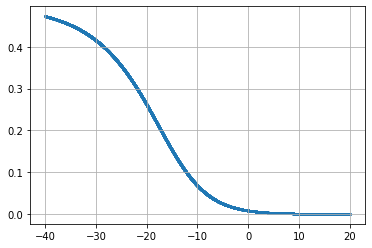

In [22]:
#Display curve to fit
# Display the dataset
plt.scatter(PSdBm[::1], BERLT[::1], s=2)
plt.grid()
plt.show()
#plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

In [23]:
# Create the model
# Create the model with two 64 units hidden layers.
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 64)                128       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Training over 100 epochs
# Training
model.fit( PSdBm, BERLT, epochs=100, verbose=1)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0015
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 9.1426e-04
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 8.7137e-04
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 5.4032e-04
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0010
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 5.6245e-04
Epoch 11/100
313/313 [==============================] - 1s 2ms/step - loss: 4.8745e-04
Epoch 12/100
313/313 [==============================] - 1s 2ms/step - loss: 

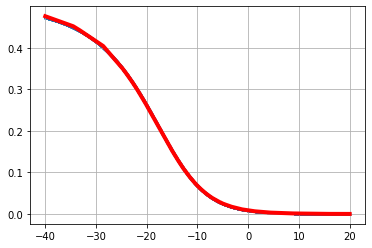

In [27]:
#Predict and display
# Compute the output 
BERLT_predicted = model.predict(PSdBm)

# Display the result
plt.scatter(PSdBm[::1], BERLT[::1], s=1)
plt.plot(PSdBm, BERLT_predicted, 'r', linewidth=4)
plt.grid()
plt.show()
#plt.savefig('training.png', dpi=300)
#files.download("training.png") 

In [ ]:
# Create image sequence for the video
# Run this section to generate a sequence of images for the video.
#To get the video from the beginning, you have to reset the model weight. Re-creating the model should reseting the weights.
for x in range(100):
  # One epoch
  model.fit( PSdBm, BERLT, epochs=1, verbose=1)

  # Compute the output 
  BERLT_predicted = model.predict(PSdBm)

  # Display the result
  plt.scatter(PSdBm[::1], BERLT[::1], s=2)
  plt.plot(PSdBm, BERLT_predicted, 'r', linewidth=4)
  plt.grid()
  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
  plt.ylim(bottom=-1.2)  
  #plt.show()
  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
  files.download('training-' + str(x) +'-epochs.png') 
  plt.clf()